# Times Higher Education University Rankings Regression Analysis

### 1-2. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [4]:
# Import dataset

df_times = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'times_top200.csv'))

### 3. Data Cleaning

##### Removing irrelevant columns

In [5]:
# Drop index column

df_times = df_times.drop(columns = ['Unnamed: 0'])

##### Missing values

In [6]:
# Check for missing values

df_times.isnull().sum()

world_rank_Times                 0
university_name                  0
country                          0
teaching_score                   0
international_outlook_score      9
research_score                   0
citations_score                  0
income_score                   140
overall_score_Times              0
num_students                    19
student_staff_ratio             19
international_students          20
female_male_ratio              123
year                             0
dtype: int64

There are some missing values in certain columns. However, replacing the values with the average values of their columns would be misrepresenting the data. As such, I will avoid these columns during the regression analysis. 

##### Duplicates check

In [7]:
# Create a dataframe with just duplicated values

dups = df_times.duplicated()

In [8]:
# Check size of duplicated dataframe

dups.shape 

(1201,)

No duplicates.

##### Extreme values checks

In [9]:
df_times.describe()

,world_rank_Times,teaching_score,international_outlook_score,research_score,citations_score,income_score,overall_score_Times,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,1201.000000,1201.000000,1192.000000,1201.000000,1201.000000,1061.000000,1201.000000,1182.000000,1182.000000,1181.000000,1078.000000,1201.000000
mean,100.233972,50.730808,59.478523,52.252040,76.928726,54.230914,59.846128,23891.501692,15.932318,0.196274,1.046978,2013.501249
std,57.634735,16.912699,21.209330,19.661541,15.535493,22.722593,12.803446,13635.554030,9.437269,0.101746,0.349331,1.708374
min,1.000000,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,0.010000,0.149425,2011.000000
25%,50.000000,38.300000,42.175000,37.100000,66.700000,36.300000,50.300000,14221.000000,10.200000,0.120000,0.886792,2012.000000
50%,100.000000,47.500000,59.500000,48.500000,78.800000,45.800000,56.000000,22616.000000,14.700000,0.180000,1.083333,2014.000000
75%,150.000000,60.200000,77.700000,64.700000,89.200000,68.200000,66.200000,31326.000000,18.700000,0.260000,1.222222,2015.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,127431.000000,85.800000,0.540000,2.333333,2016.000000


There do not seem to be any extreme values for the scores in this dataset, which makes sense since the score for each factor should be out of 100. 

### 4. Data Exploration of Variables

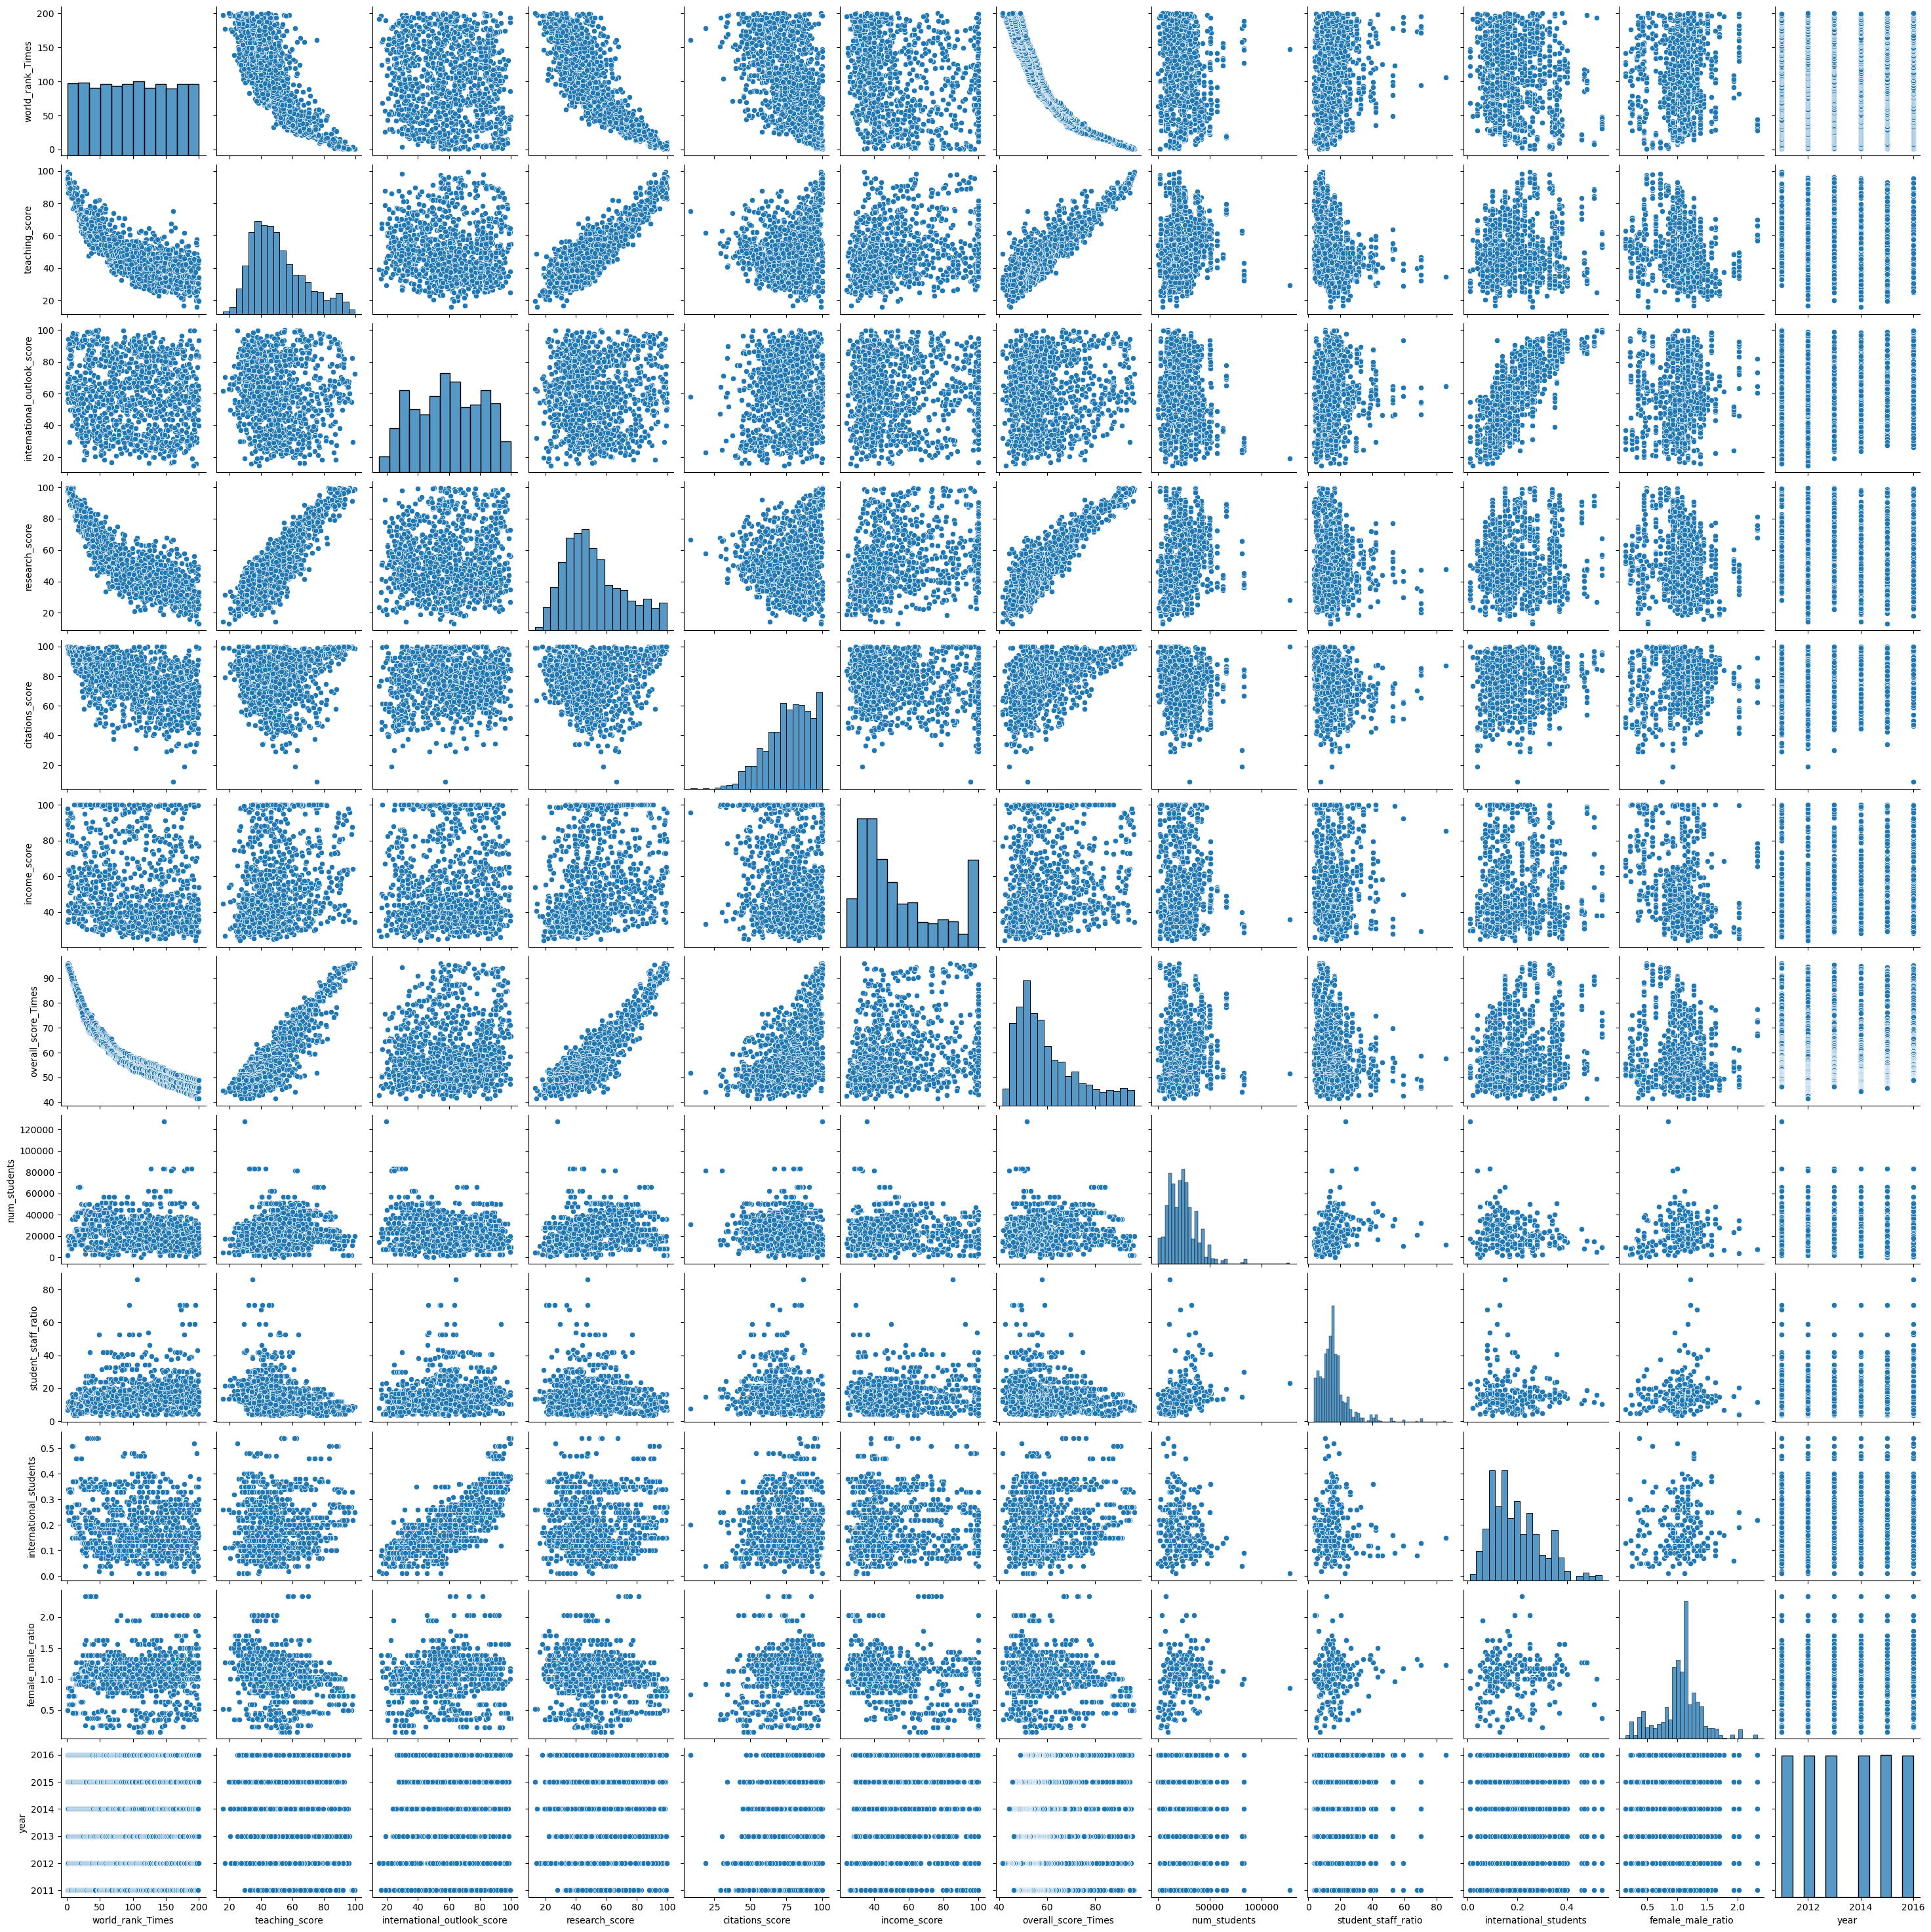

In [11]:
# Create a pair plot to see relationships between variables

g = sns.pairplot(df_times)

#### Investigate variables further 

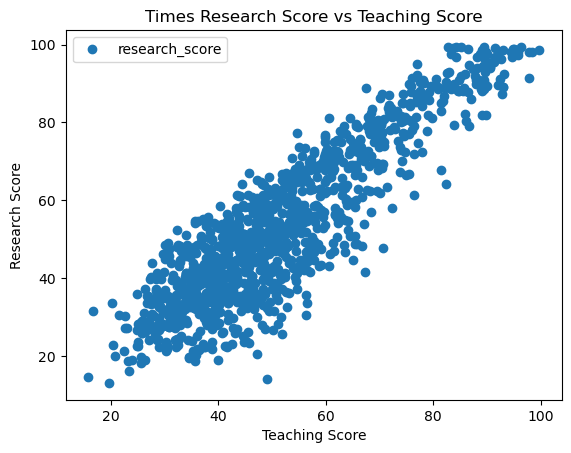

<Figure size 640x480 with 0 Axes>

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_times.plot(x = 'teaching_score', y='research_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Times Research Score vs Teaching Score')  
plt.xlabel('Teaching Score')  
plt.ylabel('Research Score')  
plt.show()
plt.tight_layout()

### 5. Hypothesis

#### Universities with a high teaching score will likely have a high research score .

### 6. Reshaping variables

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_times['teaching_score'].values.reshape(-1,1)
y = df_times['research_score'].values.reshape(-1,1)

In [15]:
X

array([[99.7],
       [97.7],
       [97.8],
       ...,
       [30.8],
       [30.5],
       [34.1]])

In [16]:
y

array([[98.7],
       [98. ],
       [91.4],
       ...,
       [27.4],
       [22.9],
       [33.3]])

### 7. Split data into training and test set

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Running Linear Regression on data

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9. Plotting the test data and the regression line

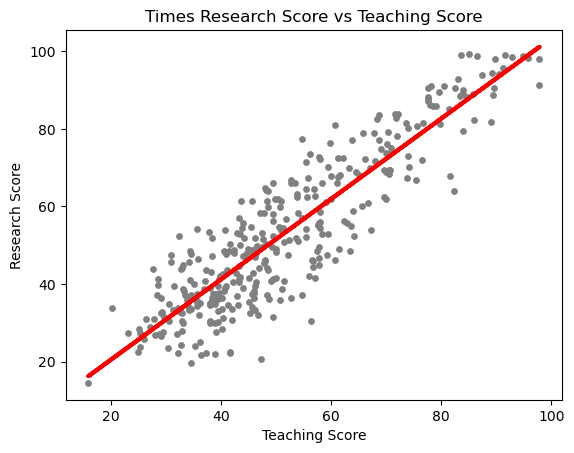

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Times Research Score vs Teaching Score')
plot_test.xlabel('Teaching Score')
plot_test.ylabel('Research Score')
plot_test.show()

### 10. Interpretation of the graph

The regression line seems to be a pretty good fit. There are a few outliers but the regression line mostly goes through the majority of values pretty evenly.

### 11. Checking the model's performance statistics

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.03607522]]
Mean squared error:  75.13794162184784
R2 score:  0.8112262851428854


Based on the R squared value, the value of 0.811 indicates that it is a pretty good fit. In addition, the error based on the Mean squared error is roughly 8.7, which is a decently small since the overall scores are out of 100. The model is decently accurate and should improve with more iterations. 

### 12. Comparing predicted y values vs actual y values

In [24]:
y_predicted

array([[ 33.8704018 ],
       [ 36.6678049 ],
       [ 57.28570186],
       [ 55.73158902],
       [ 72.51600765],
       [ 52.51975583],
       [ 46.40691201],
       [ 33.76679427],
       [ 41.12292837],
       [ 56.45684168],
       [ 44.33476156],
       [ 49.82596025],
       [ 55.21355141],
       [ 35.63172968],
       [ 37.49666508],
       [ 70.13303464],
       [ 25.78901505],
       [ 94.58440993],
       [ 66.19594879],
       [ 64.849051  ],
       [ 31.79825135],
       [ 29.82970842],
       [ 59.87588992],
       [ 49.6187452 ],
       [ 36.77141242],
       [ 61.84443285],
       [ 34.07761684],
       [ 98.00345817],
       [ 72.7232227 ],
       [ 34.38843941],
       [ 93.5483347 ],
       [ 74.17372801],
       [ 66.61037888],
       [ 87.5390984 ],
       [ 39.05077792],
       [ 35.32090711],
       [ 73.13765279],
       [ 40.60489075],
       [ 85.15612539],
       [ 82.25511476],
       [ 26.30705266],
       [ 51.48368061],
       [ 36.77141242],
       [ 44

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44.2,33.870402
1,35.5,36.667805
2,64.6,57.285702
3,58.3,55.731589
4,76.0,72.516008
5,53.9,52.519756
6,35.4,46.406912
7,24.4,33.766794
8,41.8,41.122928
9,77.3,56.456842


##### Thoughts:

The model worked decently well to predict research vs teaching scores but there could have been potential data bias. For one, while the criteria that the Times Higher Education Rankings used to evaluate universities are supposed to be independent of each other, they most likely aren't. Certain factors are likely tied together. For example, universities with high teaching scores likely have elite professors who also conduct independent or funded research, which would increase research scores. 

Another possible issue with this regression analysis is that it was only run on a subset of the original data. This dataframe only contained around 1200 rows for analysis, which may have made the model less accurate. Pairplots and regression analysis could have been done on the original dataset with 2604 rows, but the large amount of datapoints would have affected scatterplots and made analysis even more difficult. In addition, analysis with other rankings could only be done with the top 200 and 100 universities so it makes sense to analyze the top 200 universities here as well.

Regression analysis may have led to more interesting insights when predicting a university's projected world ranking vs time. However, this dataset in particular only contains data from 2011 to 2016, which means that a university only has at most 6 datapoints for world rankings. Forecasting with only 6 datapoints could lead to wide margins of error, especially if a university had an outlier for world ranking in a particular year. Another possible application could be projecting an individual country's average world ranking, but this would have similar problems. 